In [14]:
import numpy as np

In [ ]:
class SVM:
    def __init__(self , lr = 0.001 , n_iter = 1000 , lambda_ = 0.01):
        self.lr = lr
        self.lambda_ = lambda_
        self.n_iter = n_iter
        self.w = None
        self.b = None

    def fit(self , X , y):
        y_ = np.where(y > 0 , 1 , -1)
        
        n_samples , n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iter):
            for index , xi in enumerate(X):
                condition = (y_[index]*(np.dot(xi,self.w) - self.b) >= 1)
                if condition:
                    self.w -= self.lr * (2 * self.lambda_ * self.w)
                    self.b = 0
                else:
                    self.w -= self.lr * (2 * self.lambda_ * self.w - np.dot(xi , y_[index]))
                    self.b -= self.lr * y_[index]
                    
    def predict(self , X):
        linear = np.dot(X,self.w) - self.b
        return np.sign(linear)

[0.6177438  0.16213573] 0


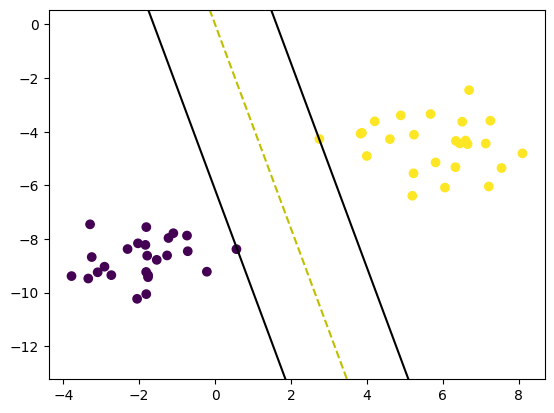

In [16]:
if __name__ == "__main__":
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM(n_iter=5000)
    clf.fit(X, y)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()